This notebook explores text classification, introducing a majority class baseline and analyzing the affect of hyperparameter choices on accuracy.

In [1]:
import sys
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import preprocessing
from sklearn import linear_model
import pandas as pd
import numpy as np

In [2]:
def read_data(filename):
    X=[]
    Y=[]
    with open(filename, encoding="utf-8") as file:
        for line in file:
            cols=line.rstrip().split("\t")
            label=cols[0]
            text=cols[1]
            # sample text data is already tokenized; if yours is not, do so here            
            X.append(text)
            Y.append(label)
    return X, Y

In [3]:
# Change this to the directory with your data (from the CheckData_TODO.ipynb exercise).  
# The directory should contain train.tsv, dev.tsv and test.tsv
directory="../data/text_classification_sample_data"

In [4]:
trainX, trainY=read_data("%s/train.tsv" % directory)
devX, devY=read_data("%s/dev.tsv" % directory)

In [5]:
def majority_class(trainY, devY):
    # Find the most frequent label in the training data
    label_counts = Counter(trainY)
    majority_label = label_counts.most_common(1)[0][0]
    
    # Predict the majority label for all items in dev set
    predictions = [majority_label] * len(devY)
    
    # Calculate accuracy
    correct = sum(p == y for p, y in zip(predictions, devY))
    accuracy = correct / len(devY)
    
    return predictions, accuracy

Baselines are critical as a point of reference to understand how well a text classification method is performing.  One of the simplest of these is the *majority class* baseline: for every point in the test data, predict the label that shows up most frequently **in the training data**.  Implement that basline for your data.

In [11]:
p, a = majority_class(trainY,devY)

Scikit-learn's [GridSearchCV](https://scikit-learn.org/stable/auto_examples/model_selection/grid_search_text_feature_extraction.html) is a convenient function for evaluating performance across a range of parameters.  For more control, let's write our own grid search function here.  Explore the performance for different parameter settings of [CountVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) (e.g., binary, stopword removal, lowercasing, etc.)

In [12]:
scores=[]
names=[]

feat_vals=[50, 100, 500, 1000, 5000, 10000, 50000]

le = preprocessing.LabelEncoder()
le.fit(trainY)
Y_train=le.transform(trainY)
Y_dev=le.transform(devY)

idx=0

for feat_val in feat_vals:

    # split the string on whitespace because we assume it has already been tokenized
    vectorizer = CountVectorizer(max_features=feat_val, analyzer=str.split, lowercase=False, strip_accents=None, binary=True)

    X_train = vectorizer.fit_transform(trainX)
    X_dev = vectorizer.transform(devX)

    print ("%s of %s trials" % (idx, len(feat_vals)))

    logreg = linear_model.LogisticRegression(C=1.0, solver='lbfgs', penalty='l2')
    logreg.fit(X_train, Y_train)
    scores.append(logreg.score(X_dev, Y_dev))
    names.append("feat_value:%s" % (feat_val))
    idx+=1

0 of 7 trials
1 of 7 trials
2 of 7 trials


/opt/anaconda3/envs/applied-machine-learning/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


3 of 7 trials


/opt/anaconda3/envs/applied-machine-learning/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


4 of 7 trials


/opt/anaconda3/envs/applied-machine-learning/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


5 of 7 trials


/opt/anaconda3/envs/applied-machine-learning/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


6 of 7 trials


/opt/anaconda3/envs/applied-machine-learning/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,value,accuracy
0,feat_value:50,0.599222
1,feat_value:100,0.634241
2,feat_value:500,0.630350
3,feat_value:1000,0.634241
4,feat_value:5000,0.684825
5,feat_value:10000,0.696498
6,feat_value:50000,0.696498


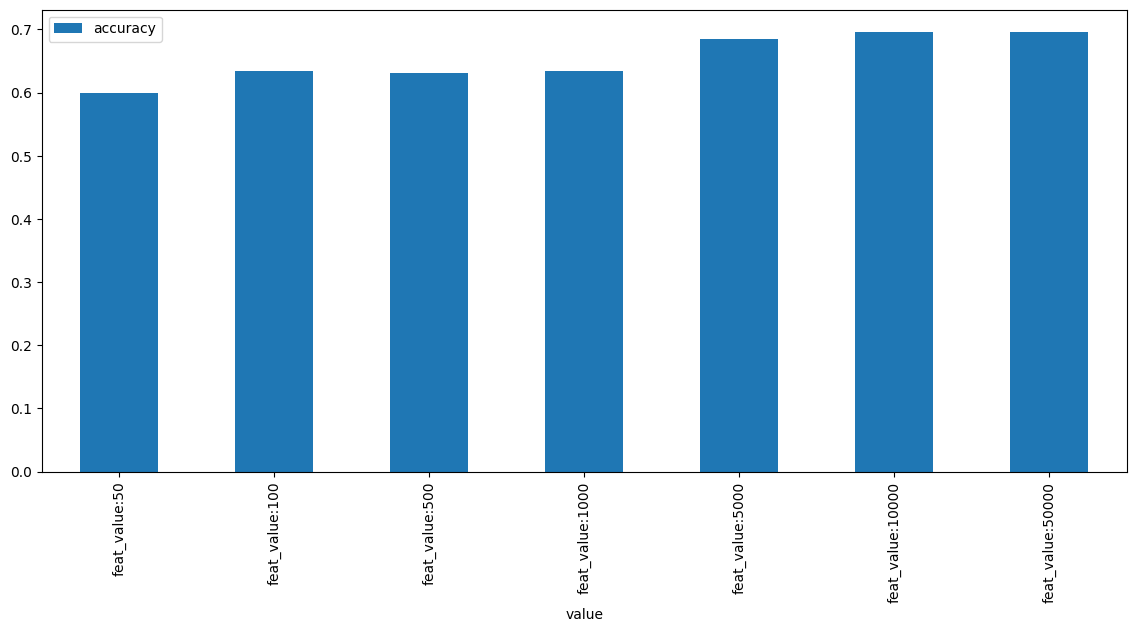

In [13]:
# Let's plot these results (may need to execute twice to diplay graph)
pd_results=pd.DataFrame({"value":names, "accuracy":scores})
pd_results.plot.bar(x='value', y='accuracy', figsize=(14,6))
pd_results

Some parameters interact with each other (like the number of features and the regularization strength). Perform grid search on a combination of features to evaluate how their interaction affects accuracy.

In [14]:
scores=[]
names=[]

feat_vals=[50, 100, 500, 1000, 5000, 10000, 50000]
C_values=[0.001, 0.1, 1, 5, 10]

le = preprocessing.LabelEncoder()
le.fit(trainY)
Y_train=le.transform(trainY)
Y_dev=le.transform(devY)

idx=0

for feat_val in feat_vals:

    # split the string on whitespace because we assume it has already been tokenized
    vectorizer = CountVectorizer(max_features=feat_val, analyzer=str.split, lowercase=False, strip_accents=None, binary=True)

    X_train = vectorizer.fit_transform(trainX)
    X_dev = vectorizer.transform(devX)

    for C_val in C_values:
        
        print ("%s of %s trials" % (idx, len(feat_vals)*len(C_values)))

        logreg = linear_model.LogisticRegression(C=C_val, solver='lbfgs', penalty='l2')
        logreg.fit(X_train, Y_train)
        scores.append(logreg.score(X_dev, Y_dev))
        names.append("feat_value:%s-C:%s" % (feat_val, C_val))
        idx+=1

0 of 35 trials
1 of 35 trials
2 of 35 trials
3 of 35 trials
4 of 35 trials
5 of 35 trials
6 of 35 trials
7 of 35 trials
8 of 35 trials
9 of 35 trials
10 of 35 trials
11 of 35 trials
12 of 35 trials
13 of 35 trials
14 of 35 trials


/opt/anaconda3/envs/applied-machine-learning/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/envs/applied-machine-learning/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

15 of 35 trials
16 of 35 trials
17 of 35 trials
18 of 35 trials
19 of 35 trials


/opt/anaconda3/envs/applied-machine-learning/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/envs/applied-machine-learning/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

20 of 35 trials
21 of 35 trials
22 of 35 trials
23 of 35 trials


/opt/anaconda3/envs/applied-machine-learning/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/envs/applied-machine-learning/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

24 of 35 trials
25 of 35 trials
26 of 35 trials
27 of 35 trials


/opt/anaconda3/envs/applied-machine-learning/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/envs/applied-machine-learning/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

28 of 35 trials
29 of 35 trials


/opt/anaconda3/envs/applied-machine-learning/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


30 of 35 trials
31 of 35 trials
32 of 35 trials


/opt/anaconda3/envs/applied-machine-learning/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


33 of 35 trials


/opt/anaconda3/envs/applied-machine-learning/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


34 of 35 trials


/opt/anaconda3/envs/applied-machine-learning/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,value,accuracy
0,feat_value:50-C:0.001,0.552529
1,feat_value:50-C:0.1,0.591440
2,feat_value:50-C:1,0.599222
3,feat_value:50-C:5,0.599222
4,feat_value:50-C:10,0.599222
5,feat_value:100-C:0.001,0.591440
6,feat_value:100-C:0.1,0.638132
7,feat_value:100-C:1,0.634241
8,feat_value:100-C:5,0.630350
9,feat_value:100-C:10,0.630350


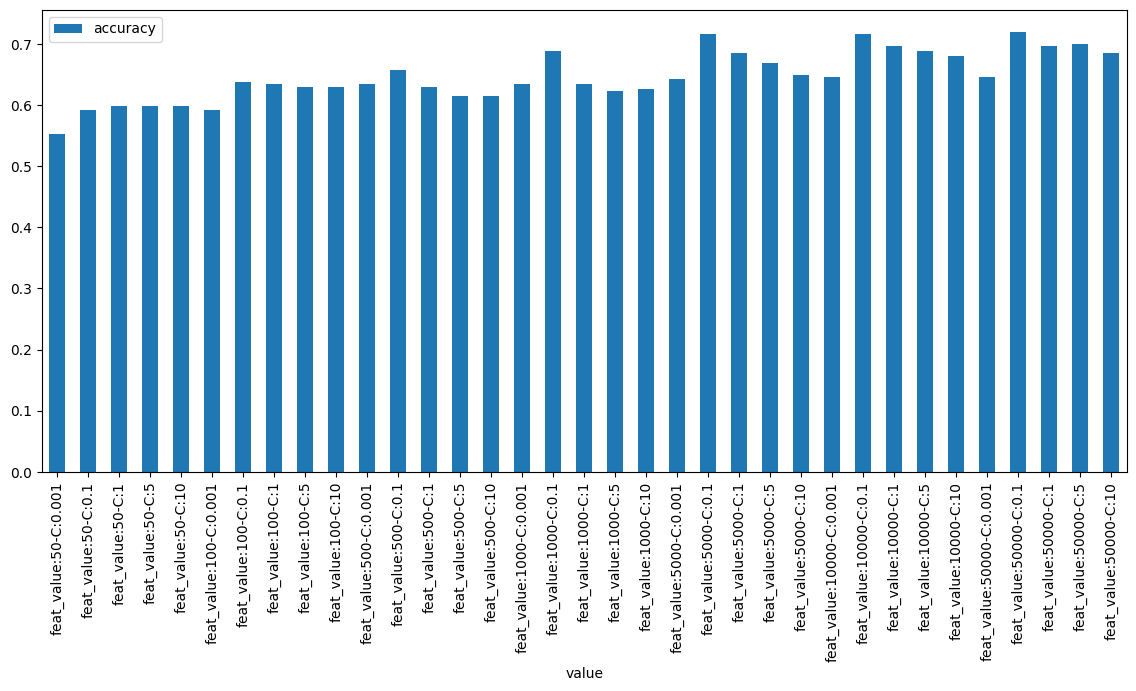

In [15]:
pd_results=pd.DataFrame({"value":names, "accuracy":scores})
pd_results.plot.bar(x='value', y='accuracy', figsize=(14,6))
pd_results